In [1]:
import matplotlib.pyplot as plt
from IPython.display import display
import sys
import pandas as pd

In [39]:
# Specify global paths
figures_dir = '/home/sirush/Dropbox/Research/PhD/LatexFiles/Dissertation/Figures/'
# filename1 will be used for the figure where the Multiple Parameter Space is used to compare against
# the Re values used to generate it
filename = 'ODECO_Transient_Channel_Hypothesis_Re='
beamer_file1 = 'ODECO_Transient_Channel_Hypothesis_Re=100.png'
beamer_file2 = 'ODECO_Transient_Channel_Hypothesis_Re=100.png'

In [3]:
# Add the Results folders of the different components
# Forward Problem
FP_dir = '/home/sirush/PhDResearch/MMS_Transient_Channel/ForwardProblem/Log_Files/'
ODECO_multiple_dir = '/home/sirush/PhDResearch/MMS_Transient_Channel/ODECO/Log_Files/MultipleParameterSpace/'

In [57]:
# Read in the data from the ODECO problem solved in the Multiple Parameter Space
# This is for Re = 100 in the Generated From Scenario
viento_log = 'log_Re{1,20,40,60,80,100}_nxnt{24,36,48,60,72}_short.txt'
hypothesis_log = 'log_multiple_Hypothesis_x=.25_y=.75_Re=100_short.txt'
ODECO_multiple_log = 'log_short_multiple_ODECO_compare_generated_from.txt'

# This is for Re = 75 in the General Scenario
# viento_log = 'log_Re{10,25,50,75}_nxnt{24,36,48,60,72}_short.txt'
# hypothesis_log = 'log_multiple_Hypothesis_x=.25_y=.75_Re=75_short.txt'
# ODECO_multiple_log = 'log_multiple_ODECO_non_generated_short.txt'

viento_data = pd.read_csv(FP_dir+viento_log, sep=' ')
hypothesis_data = pd.read_csv(ODECO_multiple_dir+hypothesis_log, sep = ' ')
ODECO_multiple_data = pd.read_csv(ODECO_multiple_dir+ODECO_multiple_log, sep = ' ')

In [58]:
hypothesis_data

,tFinal,Re,numSensors,nx,nSteps,tol,ParameterSpace,alphaErr2,relAlphaErr2,uErr2,relUErr2,KKTRunTime,ErrorCheckRunTime,VTKRunTime,TotalTime
0,1,100,1,24,24,0.999,"{1,20,40,60,80,100}",0.002239,0.026425,0.011887,0.011717,0.136580,2.12576,11.6659,17.4108
1,1,100,1,36,36,0.999,"{1,20,40,60,80,100}",0.000367,0.004330,0.002621,0.002577,0.314623,5.10446,31.8356,47.9106
2,1,100,1,48,48,0.999,"{1,20,40,60,80,100}",0.000090,0.001066,0.000926,0.000907,0.642225,10.32110,68.9226,105.9260
3,1,100,1,60,60,0.999,"{1,20,40,60,80,100}",0.000257,0.003036,0.002057,0.002027,1.186160,18.07640,128.7500,196.8060
4,1,100,1,72,72,0.999,"{1,20,40,60,80,100}",0.000335,0.003962,0.002890,0.002850,2.040630,29.60530,216.8920,332.6740


In [59]:
ODECO_multiple_data[ODECO_multiple_data['nx'].eq(60) 
                    & ODECO_multiple_data['numSensors'].eq(3)
                   & ODECO_multiple_data['Re'].eq(100)]

,tFinal,Re,numSensors,nx,nSteps,tol,ParameterSpace,alphaErr2,relAlphaErr2,uErr2,relUErr2,KKTRunTime,ErrorCheckRunTime,VTKRunTime,TotalTime
142,1,100,3,60,60,0.999,"{1,20,40,60,80,100}",0.000022,0.000261,0.000424,0.000413,1.32449,17.2968,122.533,186.439


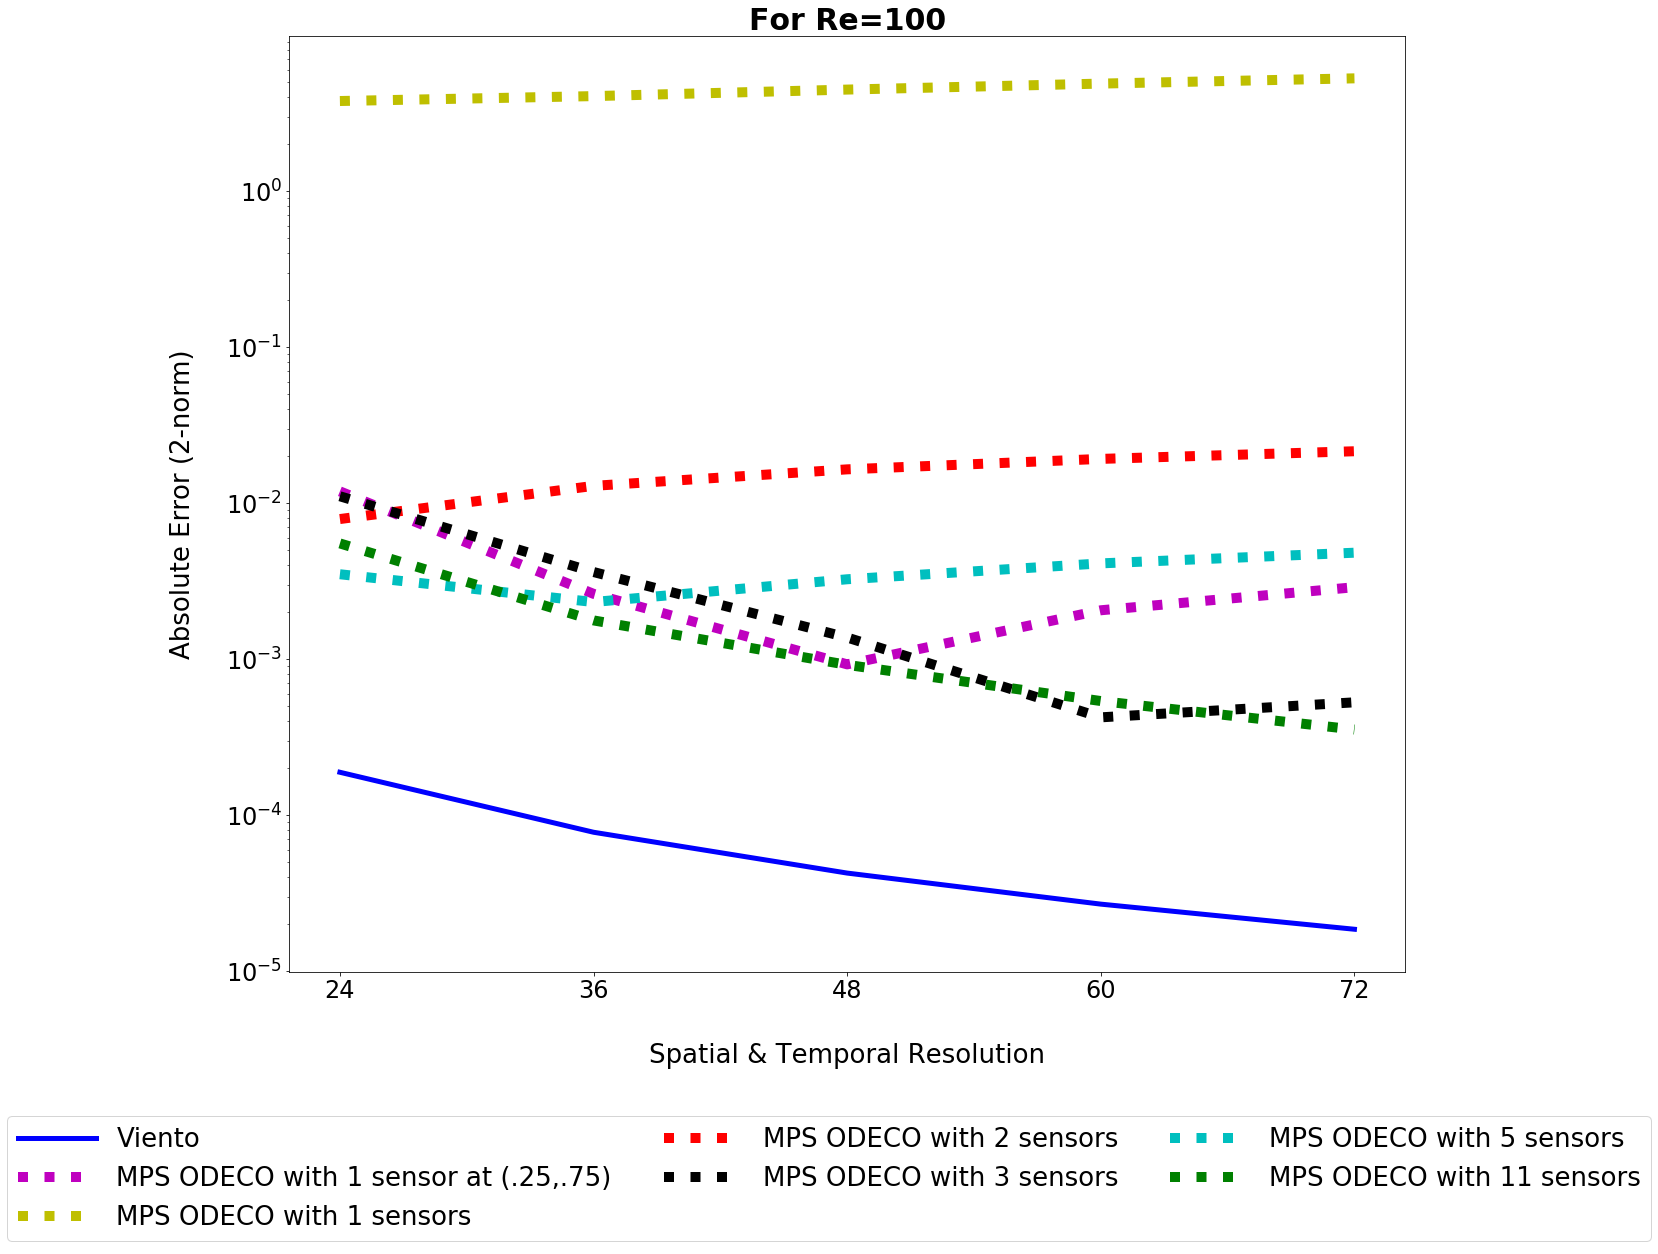

In [60]:
# Purpose is to show how MPS ODECO does for Re not used to generate the POD basis
# for Re=10,25,50,75

# plt.figure automatically assigns a fignum of 1
# figsize(width, height)
plt.figure(1,figsize=(20,20)).subplots_adjust(wspace=.2,hspace=.4,bottom=.2,top=.85) 
# Define the counter for the subplots
counter = 0
# Define a Dictionary of markers (b- is default)
markers_multiple = {1:'y-',2:'r-',3:'k-',5:'c-',11:'g-'}

for Re in hypothesis_data['Re'].unique():
    # Get the data for the value of Re
    viento = viento_data[viento_data['Re'].eq(Re)]
    hypothesis = hypothesis_data[hypothesis_data['Re'].eq(Re)]
    ODECO_multiple = ODECO_multiple_data[ODECO_multiple_data['Re'].eq(Re)]
    
    # Define the appropriate subplot
    counter += 1
    # Indexing for a sublot for figure #
    # works by specifying num rows, num cols, subplot num
    plt.subplot(int('11{}'.format(counter)))
    # Plot the Viento data
    plt.plot(viento['nx'].unique(),
            viento['uErr'],
            label='Viento',
            color='b',
            linewidth=5.0)   
    
    # Plot the approximation error for the Hypothesis
    plt.plot(hypothesis['nx'].unique(),
            hypothesis[hypothesis['numSensors'].eq(1)]['uErr2'],
            label='MPS ODECO with 1 sensor at (.25,.75)',
            linestyle='dotted',
            linewidth=10.0,
            color='m',
            markersize=10.0)  
    
    # Plot the ODECO data for the Single Parameter Space for the number of sensors used
    for sensors in ODECO_multiple['numSensors'].unique():                  
        # Plot the approximation error for the Multiple Space
        plt.plot(ODECO_multiple['nx'].unique(),
                ODECO_multiple[ODECO_multiple['numSensors'].eq(sensors)]['uErr2'],
                markers_multiple[sensors],
                label='MPS ODECO with {} sensors'.format(sensors),
                linestyle='dotted',
                linewidth=10.0,
                markersize=10.0)        
    
    # Define the axes
    plt.xlabel('Spatial & Temporal Resolution',weight='medium',size=26,labelpad=40)
    plt.ylabel('Absolute Error (2-norm)',weight='medium',size=26,labelpad=30)
    # Set ticks on the x-axis
    plt.xticks(ODECO_multiple['nx'].unique(),size=24)
    # Specify the location of the legend
    plt.figlegend(handlelength=3, loc='lower center',ncol=3,fontsize=26)
    # Set the y-axis to be log-scaled
    plt.yscale('log')
    plt.yticks(size=24)
    plt.title('For Re={}'.format(Re),weight='bold',size=30)
    
    
plt.savefig(figures_dir+filename+'{}.png'.format(Re), 
            bbox_inches='tight', pad_inches=0.1)

plt.show() # Creates a new figure

inv_data.columns.values

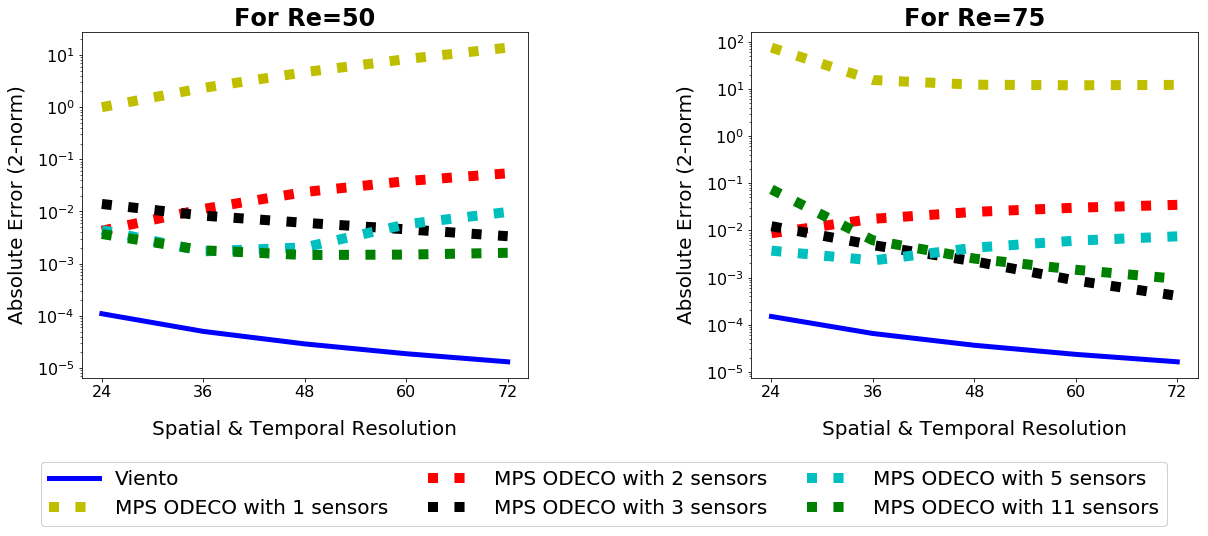

In [10]:
# Purpose is to show how MPS ODECO does for Re not used to generate the POD basis
# for Re=10,25,50,75

# plt.figure automatically assigns a fignum of 1
# figsize(width, height)
plt.figure(2,figsize=(20,8)).subplots_adjust(wspace=.5,bottom=.28) 
# Define the counter for the subplots
counter = 0
# Define a Dictionary of markers (b- is default)
markers_multiple = {1:'y-',2:'r-',3:'k-',5:'c-',11:'g-'}

list1 = [10,25]
list2 = [50,75]

for Re in list2:
    # Get the data for the value of Re
    viento = viento_data[viento_data['Re'].eq(Re)]
    ODECO_multiple = ODECO_multiple_data[ODECO_multiple_data['Re'].eq(Re)]
    
    # Define the appropriate subplot
    counter += 1
    # Indexing for a sublot for figure #
    # works by specifying num rows, num cols, subplot num
    plt.subplot(int('12{}'.format(counter)))
    # Plot the Viento data
    plt.plot(viento['nx'].unique(),
            viento['uErr'],
            label='Viento',
            color='b',
            linewidth=5.0)   
    # Plot the ODECO data for the Single Parameter Space for the number of sensors used
    for sensors in ODECO_multiple['numSensors'].unique():                  
        # Plot the approximation error for the Multiple Space
        plt.plot(ODECO_multiple['nx'].unique(),
                ODECO_multiple[ODECO_multiple['numSensors'].eq(sensors)]['uErr2'],
                markers_multiple[sensors],
                label='MPS ODECO with {} sensors'.format(sensors),
                linestyle='dotted',
                linewidth=10.0,
                markersize=10.0)        
    
    # Define the axes
    plt.xlabel('Spatial & Temporal Resolution',weight='medium',size=20,labelpad=20)
    plt.ylabel('Absolute Error (2-norm)',weight='medium',size=20,labelpad=10)
    # Set ticks on the x-axis
    plt.xticks(ODECO_multiple['nx'].unique(),size=16)
    # Specify the location of the legend
    plt.figlegend(handlelength=2.5, loc='lower center',ncol=3,fontsize=20)
    # Set the y-axis to be log-scaled
    plt.yscale('log')
    plt.yticks(size=16)
    plt.title('For Re={}'.format(Re),weight='bold',size=24)
    
    
plt.savefig(figures_dir+beamer_file2, 
            bbox_inches='tight', pad_inches=0.1)

plt.show() # Creates a new figure